# Great Energy Predictor - Submission 0

### Imports

In [1]:
%matplotlib inline

import src.utils as udf

import gc
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Default plot settings
sns.set(rc={'figure.figsize': (16, 6), 
            'font.size': 12})

### Train Data

In [3]:
train_path = '../data/output/'

In [4]:
train = pd.read_csv(f'{train_path}train.csv').iloc[:, 1:]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20137746 entries, 0 to 20137745
Data columns (total 21 columns):
site_id               int64
building_id           int64
use_encoded           int64
year_built            int64
floor_count           int64
square_feet           int64
meter                 int64
meter_reading         float64
air_temperature       float64
dew_temperature       float64
sea_level_pressure    float64
cloud_coverage        int64
precip_depth_1_hr     float64
wind_direction_x      float64
wind_direction_y      float64
wind_speed            float64
dayofyear             int64
month                 int64
day                   int64
dayofweek             int64
hour                  int64
dtypes: float64(8), int64(13)
memory usage: 3.2 GB


In [5]:
train = udf.reduce_mem(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20137746 entries, 0 to 20137745
Data columns (total 21 columns):
site_id               uint8
building_id           uint16
use_encoded           uint8
year_built            uint16
floor_count           uint8
square_feet           uint32
meter                 uint8
meter_reading         float32
air_temperature       float32
dew_temperature       float32
sea_level_pressure    float32
cloud_coverage        uint8
precip_depth_1_hr     float32
wind_direction_x      float32
wind_direction_y      float32
wind_speed            float32
dayofyear             uint16
month                 uint8
day                   uint8
dayofweek             uint8
hour                  uint8
dtypes: float32(8), uint16(3), uint32(1), uint8(9)
memory usage: 979.4 MB


In [6]:
train.describe()

,site_id,building_id,use_encoded,year_built,floor_count,square_feet,meter,meter_reading,air_temperature,dew_temperature,...,cloud_coverage,precip_depth_1_hr,wind_direction_x,wind_direction_y,wind_speed,dayofyear,month,day,dayofweek,hour
count,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,...,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07,2.013775e+07
mean,8.020024e+00,8.017682e+02,3.153236e+00,1.967274e+03,3.926300e+00,1.080729e+05,6.643496e-01,1.976952e+03,1.569178e+01,7.677642e+00,...,2.635370e+00,1.333827e+00,-5.156676e-02,-4.477805e-02,3.506267e+00,1.854408e+02,6.577214e+00,1.576095e+01,3.006964e+00,1.150230e+01
std,5.088664e+00,4.257488e+02,3.445803e+00,1.960479e+01,3.545207e+00,1.172683e+05,9.320005e-01,1.535138e+05,1.078559e+01,1.002970e+01,...,2.713280e+00,8.839670e+00,6.666142e-01,6.514297e-01,2.265095e+00,1.052687e+02,3.436838e+00,8.820539e+00,1.997193e+00,6.922019e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+03,1.000000e+00,2.830000e+02,0.000000e+00,0.000000e+00,-2.890000e+01,-3.500000e+01,...,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.980000e+02,0.000000e+00,1.963000e+03,2.000000e+00,3.284100e+04,0.000000e+00,1.800000e+01,8.300000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-7.660444e-01,-6.427876e-01,2.100000e+00,9.600000e+01,4.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00
50%,9.000000e+00,8.970000e+02,1.000000e+00,1.965000e+03,3.000000e+00,7.295800e+04,0.000000e+00,7.465000e+01,1.670000e+01,8.900000e+00,...,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+00,1.860000e+02,7.000000e+00,1.600000e+01,3.000000e+00,1.200000e+01
75%,1.300000e+01,1.180000e+03,6.000000e+00,1.971000e+03,5.000000e+00,1.400920e+05,1.000000e+00,2.473700e+02,2.390000e+01,1.600000e+01,...,4.000000e+00,0.000000e+00,5.000000e-01,5.000000e-01,4.600000e+00,2.760000e+02,1.000000e+01,2.300000e+01,5.000000e+00,1.800000e+01
max,1.500000e+01,1.448000e+03,1.500000e+01,2.015000e+03,2.600000e+01,8.750000e+05,3.000000e+00,2.190470e+07,4.720000e+01,2.610000e+01,...,9.000000e+00,3.430000e+02,1.000000e+00,1.000000e+00,1.900000e+01,3.660000e+02,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01


In [7]:
train.isnull().sum().sum()

0

In [8]:
X_train = train.drop('meter_reading', axis=1)
y_train = train.meter_reading

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

X_train: (20137746, 20)
y_train: (20137746,)


In [9]:
cols_to_drop = ['site_id', 'floor_count', 'month', 'dew_temperature']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_train.shape

(20137746, 16)

### Building and Test Data

In [10]:
building = pd.read_csv(f'{train_path}eda_building.csv').iloc[:, 1:]
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 7 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     1449 non-null int64
floor_count    1449 non-null int64
use_encoded    1449 non-null int64
dtypes: int64(6), object(1)
memory usage: 79.4+ KB


In [11]:
building = udf.reduce_mem(building)
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 7 columns):
site_id        1449 non-null uint8
building_id    1449 non-null uint16
primary_use    1449 non-null category
square_feet    1449 non-null uint32
year_built     1449 non-null uint16
floor_count    1449 non-null uint8
use_encoded    1449 non-null uint8
dtypes: category(1), uint16(2), uint32(1), uint8(3)
memory usage: 17.9 KB


In [12]:
test_path = '../data/raw/test/'

In [13]:
meter = pd.read_csv(f'{test_path}test.csv', parse_dates=['timestamp'])
meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
row_id         int64
building_id    int64
meter          int64
timestamp      datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.2 GB


In [14]:
meter = udf.reduce_mem(meter)
meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
row_id         uint32
building_id    uint16
meter          uint8
timestamp      datetime64[ns]
dtypes: datetime64[ns](1), uint16(1), uint32(1), uint8(1)
memory usage: 596.5 MB


In [15]:
meter.isnull().sum()

row_id         0
building_id    0
meter          0
timestamp      0
dtype: int64

In [16]:
meter.duplicated().sum()

0

In [17]:
test = pd.merge(meter, building, on='building_id', how='left')
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,use_encoded
0,0,0,0,2017-01-01,0,Education,7432,2008,1,0
1,1,1,0,2017-01-01,0,Education,2720,2004,1,0
2,2,2,0,2017-01-01,0,Education,5376,1991,1,0
3,3,3,0,2017-01-01,0,Education,23685,2002,1,0
4,4,4,0,2017-01-01,0,Education,116607,1975,4,0


### Weather Data

In [18]:
weather = pd.read_csv(f'{test_path}weather_test.csv', parse_dates=['timestamp'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null int64
timestamp             277243 non-null datetime64[ns]
air_temperature       277139 non-null float64
cloud_coverage        136795 non-null float64
dew_temperature       276916 non-null float64
precip_depth_1_hr     181655 non-null float64
sea_level_pressure    255978 non-null float64
wind_direction        264873 non-null float64
wind_speed            276783 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 19.0 MB


In [19]:
weather = udf.reduce_mem(weather)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277243 entries, 0 to 277242
Data columns (total 9 columns):
site_id               277243 non-null uint8
timestamp             277243 non-null datetime64[ns]
air_temperature       277139 non-null float32
cloud_coverage        136795 non-null float32
dew_temperature       276916 non-null float32
precip_depth_1_hr     181655 non-null float32
sea_level_pressure    255978 non-null float32
wind_direction        264873 non-null float32
wind_speed            276783 non-null float32
dtypes: datetime64[ns](1), float32(7), uint8(1)
memory usage: 9.8 MB


In [20]:
weather.duplicated(subset=['site_id', 'timestamp']).sum()

0

In [21]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6
1,0,2017-01-01 01:00:00,17.799999,2.0,12.8,0.0,1022.000000,130.0,3.1
2,0,2017-01-01 02:00:00,16.100000,0.0,12.8,0.0,1021.900024,140.0,3.1
3,0,2017-01-01 03:00:00,17.200001,0.0,13.3,0.0,1022.200012,140.0,3.1
4,0,2017-01-01 04:00:00,16.700001,2.0,13.3,0.0,1022.299988,130.0,2.6


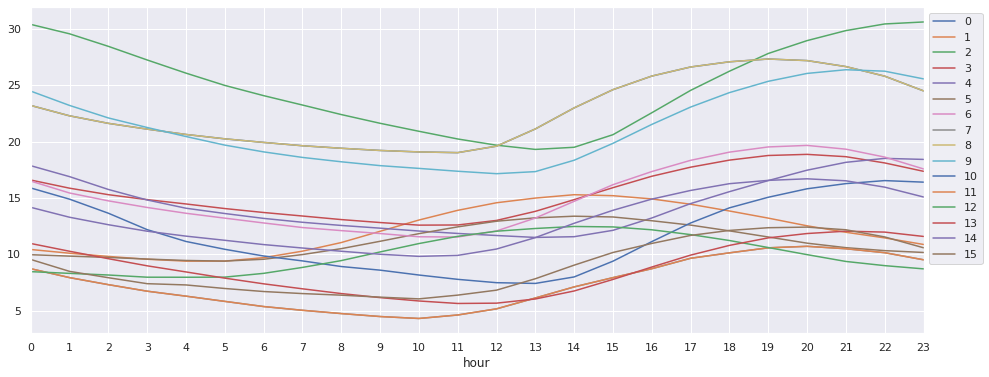

In [22]:
# Add hour column
weather['hour'] = weather.timestamp.dt.hour

# Check if measurements are recorded in UCT
hourly_bysite = pd.pivot_table(data=weather, index='hour', columns='site_id', values='air_temperature', aggfunc='mean')
hourly_bysite.plot(xticks=range(24))
plt.legend(bbox_to_anchor=(1, 1))

In [23]:
# Convert to local time
# timezone = {0:-4, 1:0, 2:-7, 3:-4, 4:-7, 5:0, 6:-4, 7:-4, 8:-4, 9:-5, 10:-7, 11:-4, 12:0, 13:-5, 14:-4, 15:-4}
timezone = [-5, 0, -7, -5, -8, 0, -5, -5, -5, -6, -7, -5, 0, -6, -5, -5]
weather = udf.to_local_time(weather, timezone)
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour
0,0,2016-12-31 19:00:00,17.799999,4.0,11.7,NaN,1021.400024,100.0,3.6,0
1,0,2016-12-31 20:00:00,17.799999,2.0,12.8,0.0,1022.000000,130.0,3.1,1
2,0,2016-12-31 21:00:00,16.100000,0.0,12.8,0.0,1021.900024,140.0,3.1,2
3,0,2016-12-31 22:00:00,17.200001,0.0,13.3,0.0,1022.200012,140.0,3.1,3
4,0,2016-12-31 23:00:00,16.700001,2.0,13.3,0.0,1022.299988,130.0,2.6,4


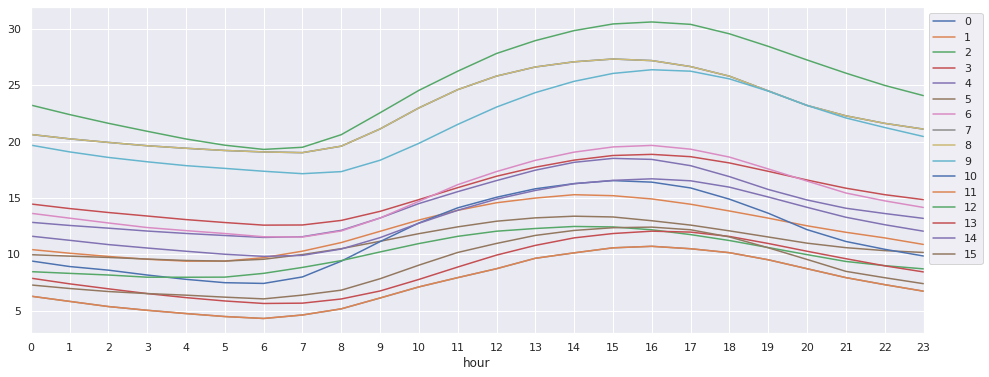

In [69]:
# # From Kaggle discussion
# weather['hour'] = weather.timestamp.dt.hour
# hourly_bysite = pd.pivot_table(data=weather, index='hour', columns='site_id', values='air_temperature', aggfunc='mean')
# hourly_bysite.plot(xticks=range(24))
# plt.legend(bbox_to_anchor=(1, 1))

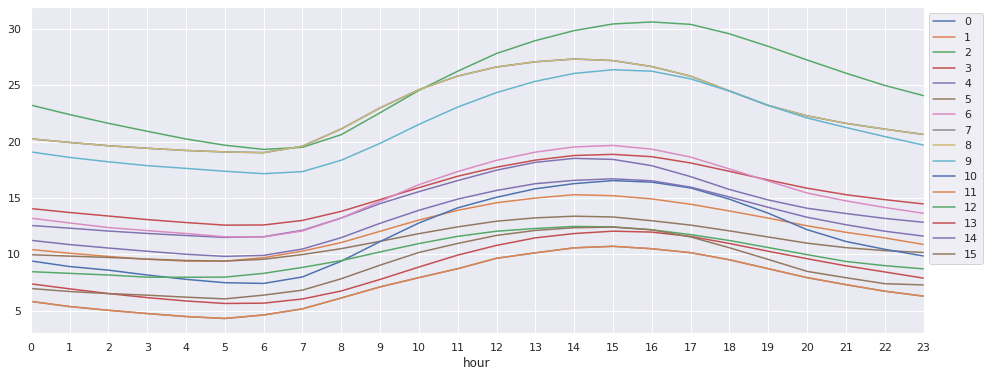

In [24]:
# Check again
weather['hour'] = weather.timestamp.dt.hour
hourly_bysite = pd.pivot_table(data=weather, index='hour', columns='site_id', values='air_temperature', aggfunc='mean')
hourly_bysite.plot(xticks=range(24))
plt.legend(bbox_to_anchor=(1, 1))

In [25]:
print(f'There should be {2 * 365 * 24 * 16} records in the weather data')

There should be 280320 records in the weather data


In [26]:
# Reindex with full timestamps
weather = udf.reidx_site_time(weather, '1/1/2017 00:00:00', '12/31/2018 23:00:00')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 10 columns):
site_id               280320 non-null uint64
timestamp             280320 non-null datetime64[ns]
air_temperature       277071 non-null float32
cloud_coverage        136767 non-null float32
dew_temperature       276848 non-null float32
precip_depth_1_hr     181593 non-null float32
sea_level_pressure    255910 non-null float32
wind_direction        264805 non-null float32
wind_speed            276715 non-null float32
hour                  277175 non-null float64
dtypes: datetime64[ns](1), float32(7), float64(1), uint64(1)
memory usage: 13.9 MB


In [27]:
weather.groupby('site_id').timestamp.nunique()

site_id
0     17520
1     17520
2     17520
3     17520
4     17520
5     17520
6     17520
7     17520
8     17520
9     17520
10    17520
11    17520
12    17520
13    17520
14    17520
15    17520
Name: timestamp, dtype: int64

In [28]:
udf.get_stats(weather)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour
count_,280320,280320,277071,136767,276848,181593,255910,264805,276715,277175
missing_,0,0,3249,143553,3472,98727,24410,15515,3605,3145
mean_,7.5,-,14.2791,2.18725,7.48923,1.09539,1016.14,180.441,3.55283,11.5014
std_,4.60978,-,10.7402,2.62184,10.154,9.15857,7.9404,110.442,2.31758,6.9179
min_,0,-,-28.1,0,-31.6,-1,972,0,0,0
max_,15,-,48.3,9,26.7,597,1050.1,360,24.2,23
dtype_,uint64,datetime64[ns],float32,float32,float32,float32,float32,float32,float32,float64


In [29]:
# Change -1 to 0.01 for precip_depth_1_hr
weather.loc[weather.precip_depth_1_hr < 0, 'precip_depth_1_hr'] = 0.01
udf.get_stats(weather)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour
count_,280320,280320,277071,136767,276848,181593,255910,264805,276715,277175
missing_,0,0,3249,143553,3472,98727,24410,15515,3605,3145
mean_,7.5,-,14.2791,2.18725,7.48923,1.16379,1016.14,180.441,3.55283,11.5014
std_,4.60978,-,10.7402,2.62184,10.154,9.14567,7.9404,110.442,2.31758,6.9179
min_,0,-,-28.1,0,-31.6,0,972,0,0,0
max_,15,-,48.3,9,26.7,597,1050.1,360,24.2,23
dtype_,uint64,datetime64[ns],float32,float32,float32,float32,float32,float32,float32,float64


In [31]:
# Missing count
udf.locate_missing(weather)

,timestamp,missing_air_temperature,missing_cloud_coverage,missing_dew_temperature,missing_precip_depth_1_hr,missing_sea_level_pressure,missing_wind_direction,missing_wind_speed,missing_hour
site_id,,,,,,,,,
0,17520,5,7548,5,34,314,482,7,5
1,17520,255,13906,255,17520,298,238,233,233
2,17520,7,5447,9,27,40,1200,16,7
3,17520,10,7856,11,51,384,260,16,8
4,17520,11,8040,14,293,130,215,11,11
5,17520,279,11624,280,17520,17520,814,280,279
6,17520,24,6486,24,64,409,1432,71,20
7,17520,952,17520,1003,15728,994,952,952,952
8,17520,5,7548,5,34,314,482,7,5


In [32]:
# Missing percentage
udf.locate_missing(weather, pct=True)

,timestamp,pct_missing_air_temperature,pct_missing_cloud_coverage,pct_missing_dew_temperature,pct_missing_precip_depth_1_hr,pct_missing_sea_level_pressure,pct_missing_wind_direction,pct_missing_wind_speed,pct_missing_hour
site_id,,,,,,,,,
0,17520,0.03,43.08,0.03,0.19,1.79,2.75,0.04,0.03
1,17520,1.46,79.37,1.46,100.00,1.70,1.36,1.33,1.33
2,17520,0.04,31.09,0.05,0.15,0.23,6.85,0.09,0.04
3,17520,0.06,44.84,0.06,0.29,2.19,1.48,0.09,0.05
4,17520,0.06,45.89,0.08,1.67,0.74,1.23,0.06,0.06
5,17520,1.59,66.35,1.60,100.00,100.00,4.65,1.60,1.59
6,17520,0.14,37.02,0.14,0.37,2.33,8.17,0.41,0.11
7,17520,5.43,100.00,5.72,89.77,5.67,5.43,5.43,5.43
8,17520,0.03,43.08,0.03,0.19,1.79,2.75,0.04,0.03


In [38]:
# Drop hour
weather.drop('hour', axis=1, inplace=True)

# Columns to fill using different methods
ffill_cols = ['precip_depth_1_hr']
lin_cols = ['cloud_coverage', 'wind_direction', 'wind_speed']
cubic_cols = ['air_temperature', 'dew_temperature', 'sea_level_pressure']

# Fill missing values
weather = udf.fill_missing(weather, ffill_cols, lin_cols, cubic_cols)

# Check the missing matrix again
udf.locate_missing(weather, pct=True)

,timestamp,pct_missing_air_temperature,pct_missing_cloud_coverage,pct_missing_dew_temperature,pct_missing_precip_depth_1_hr,pct_missing_sea_level_pressure,pct_missing_wind_direction,pct_missing_wind_speed
site_id,,,,,,,,
0,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,17520,0.0,0.0,0.0,0.0,100.0,0.0,0.0
6,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,17520,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Indices of sites 7, 11, and 15
s07_idx = weather[weather.site_id == 7].index
s11_idx = weather[weather.site_id == 11].index
s15_idx = weather[weather.site_id == 15].index

# Fill missing values
weather.loc[s07_idx, 'cloud_coverage'] = weather.loc[s15_idx, 'cloud_coverage'].values
weather.loc[s11_idx, 'cloud_coverage'] = weather.loc[s15_idx, 'cloud_coverage'].values

weather[(weather.site_id == 7) | (weather.site_id == 11)].isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [44]:
# Indices of sites 1, 5, 12, and 3
s01_idx = weather[weather.site_id == 1].index
s05_idx = weather[weather.site_id == 5].index
s12_idx = weather[weather.site_id == 12].index
s03_idx = weather[weather.site_id == 3].index

# Fill missing values
weather.loc[s01_idx, 'precip_depth_1_hr'] = weather.loc[s03_idx, 'precip_depth_1_hr'].values
weather.loc[s05_idx, 'precip_depth_1_hr'] = weather.loc[s03_idx, 'precip_depth_1_hr'].values
weather.loc[s12_idx, 'precip_depth_1_hr'] = weather.loc[s03_idx, 'precip_depth_1_hr'].values

weather.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [43]:
# Indices of sites 5 and 1
s05_idx = weather[weather.site_id == 5].index
s01_idx = weather[weather.site_id == 1].index

# Fill missing values
weather.loc[s05_idx, 'sea_level_pressure'] = weather.loc[s01_idx, 'sea_level_pressure'].values
weather.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [46]:
# Add x and y wind direction columns
weather = udf.deg_to_components(weather, 'wind_direction')
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,wind_direction_x,wind_direction_y
0,0,2017-01-01 00:00:00,15.6,2.0,12.8,0.0,1022.099976,130.0,2.1,-0.642788,0.766044
1,0,2017-01-01 01:00:00,15.0,0.0,12.8,0.0,1021.700012,150.0,1.5,-0.866025,0.500000
2,0,2017-01-01 02:00:00,15.0,2.0,13.3,0.0,1021.599976,0.0,0.0,0.000000,0.000000
3,0,2017-01-01 03:00:00,13.3,0.0,12.2,0.0,1021.400024,0.0,0.0,0.000000,0.000000
4,0,2017-01-01 04:00:00,12.2,4.0,11.7,0.0,1021.400024,0.0,0.0,0.000000,0.000000


In [53]:
# Add time component columns
weather = udf.extract_from_dt(weather, ['dayofyear', 'day', 'dayofweek', 'hour'])
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,wind_direction_x,wind_direction_y,dayofyear,month,day,dayofweek,hour
0,0,2017-01-01 00:00:00,15.6,2.0,12.8,0.0,1022.099976,130.0,2.1,-0.642788,0.766044,1,1,1,6,0
1,0,2017-01-01 01:00:00,15.0,0.0,12.8,0.0,1021.700012,150.0,1.5,-0.866025,0.500000,1,1,1,6,1
2,0,2017-01-01 02:00:00,15.0,2.0,13.3,0.0,1021.599976,0.0,0.0,0.000000,0.000000,1,1,1,6,2
3,0,2017-01-01 03:00:00,13.3,0.0,12.2,0.0,1021.400024,0.0,0.0,0.000000,0.000000,1,1,1,6,3
4,0,2017-01-01 04:00:00,12.2,4.0,11.7,0.0,1021.400024,0.0,0.0,0.000000,0.000000,1,1,1,6,4


In [54]:
weather = udf.reduce_mem(weather)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280320 entries, 0 to 280319
Data columns (total 16 columns):
site_id               280320 non-null uint64
timestamp             280320 non-null datetime64[ns]
air_temperature       280320 non-null float32
cloud_coverage        280320 non-null float32
dew_temperature       280320 non-null float32
precip_depth_1_hr     280320 non-null float32
sea_level_pressure    280320 non-null float32
wind_direction        280320 non-null float32
wind_speed            280320 non-null float32
wind_direction_x      280320 non-null float32
wind_direction_y      280320 non-null float32
dayofyear             280320 non-null uint16
month                 280320 non-null uint8
day                   280320 non-null uint8
dayofweek             280320 non-null uint8
hour                  280320 non-null uint8
dtypes: datetime64[ns](1), float32(9), uint16(1), uint64(1), uint8(4)
memory usage: 15.5 MB


### Feature Selection

In [55]:
X_test = pd.merge(test, weather, on=['site_id', 'timestamp'], how='left')
X_test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,use_encoded,...,sea_level_pressure,wind_direction,wind_speed,wind_direction_x,wind_direction_y,dayofyear,month,day,dayofweek,hour
0,0,0,0,2017-01-01,0,Education,7432,2008,1,0,...,1022.099976,130.0,2.1,-0.642788,0.766044,1,1,1,6,0
1,1,1,0,2017-01-01,0,Education,2720,2004,1,0,...,1022.099976,130.0,2.1,-0.642788,0.766044,1,1,1,6,0
2,2,2,0,2017-01-01,0,Education,5376,1991,1,0,...,1022.099976,130.0,2.1,-0.642788,0.766044,1,1,1,6,0
3,3,3,0,2017-01-01,0,Education,23685,2002,1,0,...,1022.099976,130.0,2.1,-0.642788,0.766044,1,1,1,6,0
4,4,4,0,2017-01-01,0,Education,116607,1975,4,0,...,1022.099976,130.0,2.1,-0.642788,0.766044,1,1,1,6,0


In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41697600 entries, 0 to 41697599
Data columns (total 24 columns):
row_id                uint32
building_id           uint16
meter                 uint8
timestamp             datetime64[ns]
site_id               uint8
primary_use           category
square_feet           uint32
year_built            uint16
floor_count           uint8
use_encoded           uint8
air_temperature       float32
cloud_coverage        float32
dew_temperature       float32
precip_depth_1_hr     float32
sea_level_pressure    float32
wind_direction        float32
wind_speed            float32
wind_direction_x      float32
wind_direction_y      float32
dayofyear             uint16
month                 uint8
day                   uint8
dayofweek             uint8
hour                  uint8
dtypes: category(1), datetime64[ns](1), float32(9), uint16(3), uint32(2), uint8(8)
memory usage: 2.9 GB


In [60]:
# Drop columns
cols_to_drop = ['row_id', 'timestamp', 'site_id', 'primary_use', 'floor_count', 'dew_temperature', 'wind_direction']
X_test.drop(cols_to_drop, axis=1, inplace=True)
X_test.shape

(41697600, 16)

In [58]:
X_train.shape

(20137746, 16)

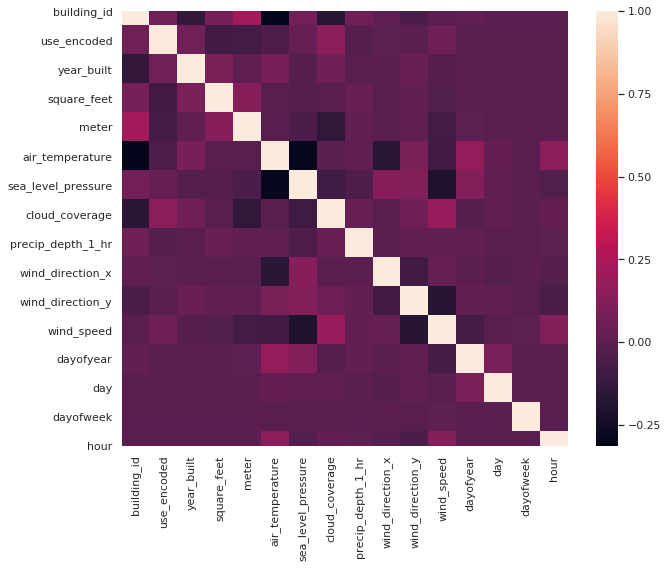

In [65]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr())

In [68]:
del train, test, meter, weather, building, cols_to_drop, ffill_cols, lin_cols, cubic_cols, hourly_bysite, fig, \
    timezone, train_path, test_path, s01_idx, s03_idx, s05_idx, s07_idx, s11_idx, s12_idx, s15_idx
gc.collect()

447

In [ ]:
pre_cv = RandomForestRegressor(n_estimators=400, 
                           max_depth=80, 
                           min_samples_split=20, 
                           min_samples_leaf=5, 
                           random_state=42)

cross_val_scores(pre_cv, X_train, y_train, cv=4, n_jobs=4, verbose=2)

In [ ]:
pre = RandomForestRegressor(n_estimators=400, 
                           max_depth=80, 
                           min_samples_split=20, 
                           min_samples_leaf=5, 
                           random_state=42, 
                           n_jobs=8, 
                           verbose=2)

pre.fit(X_train, y_train)

In [ ]:
pre.feature_importances_

In [30]:
pres = pre.predict(X_test)

In [66]:
# Drop columns
cols_to_drop = ['sea_level_pressure', 'cloud_coverage', 'wind_direction_x', 'wind_direction_y', 'day']

X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)

(20137746, 11)
(41697600, 11)


### Model

In [ ]:
rf_cv = RandomForestRegressor(n_estimators=400, 
                           max_depth=80, 
                           min_samples_split=20, 
                           min_samples_leaf=5, 
                           random_state=42)

cross_val_scores(rf_cv, X_train, y_train, cv=4, n_jobs=4, verbose=2)

In [ ]:
rf = RandomForestRegressor(n_estimators=400, 
                           max_depth=80, 
                           min_samples_split=20, 
                           min_samples_leaf=5, 
                           random_state=42, 
                           n_jobs=8, 
                           verbose=2)

rf.fit(X_train, y_train)

In [ ]:
rf.feature_importances_

In [30]:
preds = rf.predict(X_test)